In [1]:
# Sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import data_preparation, mrmr
from classification import LR, KNN, RF, XGB

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

import time
import pickle

---------

# Datasets

In [2]:
# FDI
df_fdi, X_fdi, y_fdi = data_preparation.load_dataset(module_path + '\\dataset\\single_attack_FDI.csv')
X_fdi = X_fdi.iloc[:,:-1]
X_fdi.head()

,U1 - SCADA,U2 - SCADA,U3 - SCADA,U4 - SCADA,U5 - SCADA,U6 - SCADA,U7 - SCADA,U8 - SCADA,U9 - SCADA,U10 - SCADA,U11 - SCADA,U12 - SCADA,U13 - SCADA,U14 - SCADA,P2 - SCADA,P3 - SCADA,P4 - SCADA,P5 - SCADA,P6 - SCADA,P7 - SCADA,P8 - SCADA,P9 - SCADA,P10 - SCADA,P11 - SCADA,P12 - SCADA,P13 - SCADA,P14 - SCADA,Q2 - SCADA,Q3 - SCADA,Q4 - SCADA,Q5 - SCADA,Q6 - SCADA,Q7 - SCADA,Q8 - SCADA,Q9 - SCADA,Q10 - SCADA,Q11 - SCADA,Q12 - SCADA,Q13 - SCADA,Q14 - SCADA,U1 - EM - EKF,U2 - EM - EKF,U3 - EM - EKF,U4 - EM - EKF,U5 - EM - EKF,U6 - EM - EKF,U7 - EM - EKF,U8 - EM - EKF,U9 - EM - EKF,U10 - EM - EKF,U11 - EM - EKF,U12 - EM - EKF,U13 - EM - EKF,U14 - EM - EKF,P2 - EM - EKF,P3 - EM - EKF,P4 - EM - EKF,P5 - EM - EKF,P6 - EM - EKF,P7 - EM - EKF,P8 - EM - EKF,P9 - EM - EKF,P10 - EM - EKF,P11 - EM - EKF,P12 - EM - EKF,P13 - EM - EKF,P14 - EM - EKF,Q2 - EM - EKF,Q3 - EM - EKF,Q4 - EM - EKF,Q5 - EM - EKF,Q6 - EM - EKF,Q7 - EM - EKF,Q8 - EM - EKF,Q9 - EM - EKF,Q10 - EM - EKF,Q11 - EM - EKF,Q12 - EM - EKF,Q13 - EM - EKF,Q14 - EM - EKF,U1 - FM - EKF,U2 - FM - EKF,U3 - FM - EKF,U4 - FM - EKF,U5 - FM - EKF,U6 - FM - EKF,U7 - FM - EKF,U8 - FM - EKF,U9 - FM - EKF,U10 - FM - EKF,U11 - FM - EKF,U12 - FM - EKF,U13 - FM - EKF,U14 - FM - EKF,P2 - FM - EKF,P3 - FM - EKF,P4 - FM - EKF,P5 - FM - EKF,P6 - FM - EKF,P7 - FM - EKF,P8 - FM - EKF,P9 - FM - EKF,P10 - FM - EKF,P11 - FM - EKF,P12 - FM - EKF,P13 - FM - EKF,P14 - FM - EKF,Q2 - FM - EKF,Q3 - FM - EKF,Q4 - FM - EKF,Q5 - FM - EKF,Q6 - FM - EKF,Q7 - FM - EKF,Q8 - FM - EKF,Q9 - FM - EKF,Q10 - FM - EKF,Q11 - FM - EKF,Q12 - FM - EKF,Q13 - FM - EKF,Q14 - FM - EKF,U1 - ES - EKF,U2 - ES - EKF,U3 - ES - EKF,U4 - ES - EKF,U5 - ES - EKF,U6 - ES - EKF,U7 - ES - EKF,U8 - ES - EKF,U9 - ES - EKF,U10 - ES - EKF,U11 - ES - EKF,U12 - ES - EKF,U13 - ES - EKF,U14 - ES - EKF,ph2 - ES - EKF,ph3 - ES - EKF,ph4 - ES - EKF,ph5 - ES - EKF,ph6 - ES - EKF,ph7 - ES - EKF,ph8 - ES - EKF,ph9 - ES - EKF,ph10 - ES - EKF,ph11 - ES - EKF,ph12 - ES - EKF,ph13 - ES - EKF,ph14 - ES - EKF,U1 - FS - EKF,U2 - FS - EKF,U3 - FS - EKF,U4 - FS - EKF,U5 - FS - EKF,U6 - FS - EKF,U7 - FS - EKF,U8 - FS - EKF,U9 - FS - EKF,U10 - FS - EKF,U11 - FS - EKF,U12 - FS - EKF,U13 - FS - EKF,U14 - FS - EKF,ph2 - FS - EKF,ph3 - FS - EKF,ph4 - FS - EKF,ph5 - FS - EKF,ph6 - FS - EKF,ph7 - FS - EKF,ph8 - FS - EKF,ph9 - FS - EKF,ph10 - FS - EKF,ph11 - FS - EKF,ph12 - FS - EKF,ph13 - FS - EKF,ph14 - FS - EKF,U1 - NI,U2 - NI,U3 - NI,U4 - NI,U5 - NI,U6 - NI,U7 - NI,U8 - NI,U9 - NI,U10 - NI,U11 - NI,U12 - NI,U13 - NI,U14 - NI,P2 - NI,P3 - NI,P4 - NI,P5 - NI,P6 - NI,P7 - NI,P8 - NI,P9 - NI,P10 - NI,P11 - NI,P12 - NI,P13 - NI,P14 - NI,Q2 - NI,Q3 - NI,Q4 - NI,Q5 - NI,Q6 - NI,Q7 - NI,Q8 - NI,Q9 - NI,Q10 - NI,Q11 - NI,Q12 - NI,Q13 - NI,Q14 - NI
0,1.057483,1.074413,1.023901,1.017519,1.019670,1.056229,1.049351,1.041063,1.052820,1.056524,1.057902,1.051112,1.060856,1.041156,0.426963,-0.589860,-0.334385,-0.102323,-0.064459,1.860000e-09,2.090000e-07,-0.170750,-0.052046,-0.020205,-0.035261,-0.078464,-0.085927,1.025402,-0.131152,-0.131929,-0.167108,-0.103520,1.720000e-11,-0.051326,0.116392,-0.033402,-0.010385,-0.009244,-0.033312,-0.028782,1.058205,1.073529,1.020204,1.022857,1.024105,1.057810,1.046861,1.038207,1.053193,1.049723,1.051729,1.049547,1.047047,1.040265,0.431815,-0.617977,-0.337901,-0.102259,-0.065025,0.000035,0.000031,-0.169341,-0.051957,-0.020210,-0.035279,-0.078029,-0.085638,1.039366,-0.131380,-0.132885,-0.166971,-0.102896,-0.000030,-0.051008,0.115755,-0.033416,-0.010349,-0.009178,-0.033257,-0.028734,1.059802,1.045100,1.023074,1.024918,1.026043,1.059800,1.048874,1.040142,1.055202,1.051738,1.053733,1.051533,1.049031,1.042250,0.116575,-0.543654,-0.276325,-0.044015,-0.064764,0.000016,0.000008,-0.170469,-0.051882,-0.020249,-0.035224,-0.077995,-0.085777,0.047676,0.012554,0.022591,-0.009227,-0.103321,0.000010,-0.051562,0.115764,-0.033429,-0.010354,-0.009258,-0.033470,-0.028895,1.058205,1.073529,1.020204,1.022857,1.024105,1.057810,1.046861,1.038207,1.053193,1.049723,1.051729,1.049

In [3]:
X_fdi.shape, y_fdi.shape

((5720, 214), (5720,))

------------

# Data Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

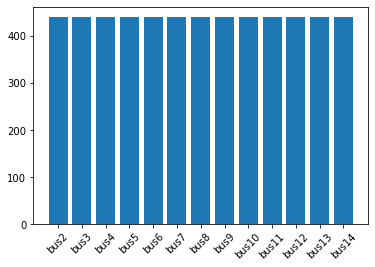

In [4]:
num = y_fdi.value_counts()
num =list(np.array(num))
names = ['bus2', 'bus3', 'bus4', 'bus5', 'bus6', 'bus7', 'bus8', 'bus9', 'bus10', 'bus11', 'bus12', 'bus13', 'bus14']

plt.figure()
plt.bar(names, num)
plt.xticks(rotation=45)

--------------

# FDI ML models

### 1. All features

In [5]:
X_train, X_test, y_train, y_test = data_preparation.split_data(X_fdi, y_fdi, test_size=0.2, random_state=123)

train = 1

if train==1:
    # training
    train_LR = -time.time()
    LR(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\lr_model.pickle', save_param='\\SE_bus_FDI\\classification_models\\lr_parametres.pickle')
    train_LR += time.time()
    print('LR')

    train_KNN = -time.time()
    KNN(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\knn_model.pickle', save_param='\\SE_bus_FDI\\classification_models\\knn_parametres.pickle')
    train_KNN += time.time()
    print('KNN')

    train_RF = -time.time()
    RF(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\rf_model.pickle', save_param='\\SE_bus_FDI\\classification_models\\rf_parametres.pickle')
    train_RF += time.time()
    print('RF')
    
    train_XGB = -time.time()
    XGB(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\xgb_model.pickle', save_param='\\SE_bus_FDI\\classification_models\\xgb_parametres.pickle')
    train_XGB += time.time()
    print('XGB')
    
    train_time = data_preparation.to_dict(train_LR, train_KNN, train_RF, train_XGB)
    data_preparation.save_model(train_time, 'time/train_time')
    
train_time = data_preparation.load_model('time/train_time')
    
# load models
lr = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\lr_model.pickle', 'rb'))
knn = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\knn_model.pickle', 'rb'))
rf = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\rf_model.pickle', 'rb'))
xgb = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\xgb_model.pickle', 'rb'))
    
# load parameters
lr_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\lr_parametres.pickle', 'rb'))
knn_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\knn_parametres.pickle', 'rb'))
rf_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\rf_parametres.pickle', 'rb'))
xgb_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\xgb_parametres.pickle', 'rb'))
    
# prediction
test_LR = -time.time()
y_pred_lr = lr.predict(X_test)
test_LR += time.time()
    
test_KNN = -time.time()
y_pred_knn = knn.predict(X_test)
test_KNN += time.time()
    
test_RF = -time.time()
y_pred_rf = rf.predict(X_test)
test_RF += time.time()
    
test_XGB = -time.time()
y_pred_xgb = xgb.predict(X_test)
test_XGB += time.time()
       
# F1 score
macro_f1_lr = f1_score(y_test, y_pred_lr, average='macro')
macro_f1_knn = f1_score(y_test, y_pred_knn, average='macro')
macro_f1_rf = f1_score(y_test, y_pred_rf, average='macro')
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

LR
KNN
RF
XGB


In [6]:
print('##############')
print('F1 score:')
print('LR', macro_f1_lr*100) 
print('KNN', macro_f1_knn*100)
print('RF', macro_f1_rf*100)
print('XGB', macro_f1_xgb*100)

print('##############')
print('Training Time:')
print('LR', train_time['LR'], 'sec')
print('KNN', train_time['KNN'], 'sec')
print('RF', train_time['RF'], 'sec')
print('XGB', train_time['XGB'], 'sec')

print('##############')
print('Testing Time:')
print('LR', test_LR, 'sec')
print('KNN', test_KNN, 'sec')
print('RF', test_RF, 'sec')
print('XGB', test_XGB, 'sec')

print('##############')
print('Parameters:')
print('LR:', lr_param)
print('KNN:', knn_param)
print('RF:', rf_param)
print('XGB:', xgb_param)

##############
F1 score:
LR 100.0
KNN 99.21206684612042
RF 100.0
XGB 100.0
##############
Training Time:
LR 160.71649885177612 sec
KNN 18.540349006652832 sec
RF 627.1749830245972 sec
XGB 3869.9858169555664 sec
##############
Testing Time:
LR 0.007157087326049805 sec
KNN 0.21328973770141602 sec
RF 0.3289518356323242 sec
XGB 0.45516395568847656 sec
##############
Parameters:
LR: ['newton-cg', 'none', 8.326365835633833]
KNN: [3, 'uniform']
RF: [734, 8, 3, 6]
XGB: [734, 8, 0.341033659841376, 0.9062277773751638, 0.8995352601864789]


------------

# MRMR

In [7]:
selected_features_fdi = mrmr.mrmr_classif(X_fdi, y_fdi, K = 30 , relevance = 'mi', redundancy = 'spearman', denominator = 'mean')

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 301.63it/s]


### 2. Best N features

In [8]:
N = 15
best_features = selected_features_fdi[:N]
best_features

['Q4 - SCADA',
 'Q6 - EM - EKF',
 'Q4 - EM - EKF',
 'Q7 - EM - EKF',
 'Q9 - EM - EKF',
 'Q4 - NI',
 'P4 - NI',
 'P6 - EM - EKF',
 'Q9 - SCADA',
 'P9 - NI',
 'P6 - SCADA',
 'Q5 - EM - EKF',
 'Q10 - EM - EKF',
 'Q9 - NI',
 'Q14 - EM - EKF']

In [10]:
X_best = X_fdi.loc[:, best_features] 
X_train, X_test, y_train, y_test = data_preparation.split_data(X_best, y_fdi, test_size=0.2, random_state=123)

train = 1

if train==1:
    train_LR = -time.time()
    LR(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\lr_model_mrmr.pickle', save_param='\\SE_bus_FDI\\classification_models\\lr_parametres_mrmr.pickle')
    train_LR += time.time()
    print('LR')

    train_KNN = -time.time()
    KNN(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\knn_model_mrmr.pickle', save_param='\\SE_bus_FDI\\classification_models\\knn_parametres_mrmr.pickle')
    train_KNN += time.time()
    print('KNN')

    train_RF = -time.time()
    RF(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\rf_model_mrmr.pickle', save_param='\\SE_bus_FDI\\classification_models\\rf_parametres_mrmr.pickle')
    train_RF += time.time()
    print('RF')

    train_XGB = -time.time()
    XGB(X_train, y_train, normalize=False, save_model='\\SE_bus_FDI\\classification_models\\xgb_model_mrmr.pickle', save_param='\\SE_bus_FDI\\classification_models\\xgb_parametres_mrmr.pickle')
    train_XGB += time.time()
    print('XGB')
    
    train_time = data_preparation.to_dict(train_LR, train_KNN, train_RF, train_XGB)
    data_preparation.save_model(train_time, 'time/train_time_mrmr')


train_time = data_preparation.load_model('time/train_time_mrmr')

# load models
lr = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\lr_model_mrmr.pickle', 'rb'))
knn = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\knn_model_mrmr.pickle', 'rb'))
rf = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\rf_model_mrmr.pickle', 'rb'))
xgb = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\xgb_model_mrmr.pickle', 'rb'))

# load parameters
lr_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\lr_parametres_mrmr.pickle', 'rb'))
knn_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\knn_parametres_mrmr.pickle', 'rb'))
rf_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\rf_parametres_mrmr.pickle', 'rb'))
xgb_param = pickle.load(open(module_path + '\\single_attack\\SE_bus_FDI\\classification_models\\xgb_parametres_mrmr.pickle', 'rb'))


# prediction
test_LR = -time.time()
y_pred_lr = lr.predict(X_test)
test_LR += time.time()

test_KNN = -time.time()
y_pred_knn = knn.predict(X_test)
test_KNN += time.time()

test_RF = -time.time()
y_pred_rf = rf.predict(X_test)
test_RF += time.time()

test_XGB = -time.time()
y_pred_xgb = xgb.predict(X_test)
test_XGB += time.time()

# F1 score
macro_f1_lr = f1_score(y_test, y_pred_lr, average='macro')
macro_f1_knn = f1_score(y_test, y_pred_knn, average='macro')
macro_f1_rf = f1_score(y_test, y_pred_rf, average='macro')
macro_f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

LR
KNN
RF
XGB


In [11]:
print('##############')
print('F1 score:')
print('LR', macro_f1_lr*100) 
print('KNN', macro_f1_knn*100)
print('RF', macro_f1_rf*100)
print('XGB', macro_f1_xgb*100)

print('##############')
print('Training Time:')
print('LR', train_time['LR'], 'sec')
print('KNN', train_time['KNN'], 'sec')
print('RF', train_time['RF'], 'sec')
print('XGB', train_time['XGB'], 'sec')

print('##############')
print('Testing Time:')
print('LR', test_LR, 'sec')
print('KNN', test_KNN, 'sec')
print('RF', test_RF, 'sec')
print('XGB', test_XGB, 'sec')

print('##############')
print('Parameters:')
print('LR:', lr_param)
print('KNN:', knn_param)
print('RF:', rf_param)
print('XGB:', xgb_param)

##############
F1 score:
LR 98.322526469108
KNN 82.58810883488148
RF 100.0
XGB 100.0
##############
Training Time:
LR 171.75972771644592 sec
KNN 6.061019659042358 sec
RF 172.73325085639954 sec
XGB 557.8468894958496 sec
##############
Testing Time:
LR 0.002051830291748047 sec
KNN 0.03947949409484863 sec
RF 0.2260277271270752 sec
XGB 0.1829698085784912 sec
##############
Parameters:
LR: ['newton-cg', 'none', 8.326365835633833]
KNN: [27, 'distance']
RF: [446, 13, 4, 9]
XGB: [474, 8, 0.0182314258489305, 0.9363991834158868, 0.514208650528159]
